In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw04.ok')

Assignment: Homework 4: Functions, Tables, and Groups
OK, version v1.18.1



# Homework 4: Functions, Tables, and Groups

**Helpful Resource:**
- [Python Reference](http://data8.org/sp21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Reading**: 
* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Thursday, February 18 at 11:59 P.M PST. You will receive an early submission bonus point if you turn in your final submission by Wednesday, February 17 at 11:59 P.M PST. Late work will not be accepted as per the [policies](http://data8.org/sp21/policies.html) page.


### **Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/sp21/office-hours.html](http://data8.org/sp21/office-hours.html).

In [ ]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import *
def new_save_notebook(self):
    """ Saves the current notebook by
        injecting JavaScript to save to .ipynb file.
    """
    try:
        from IPython.display import display, Javascript
    except ImportError:
        log.warning("Could not import IPython Display Function")
        print("Make sure to save your notebook before sending it to OK!")
        return

    if self.mode == "jupyter":
        display(Javascript('IPython.notebook.save_checkpoint();'))
        display(Javascript('IPython.notebook.save_notebook();'))
    elif self.mode == "jupyterlab":
        display(Javascript('document.querySelector(\'[data-command="docmanager:save"]\').click();'))   

    print('Saving notebook...', end=' ')

    ipynbs = [path for path in self.assignment.src
              if os.path.splitext(path)[1] == '.ipynb']
    # Wait for first .ipynb to save
    if ipynbs:
        if wait_for_save(ipynbs[0]):
            print("Saved '{}'.".format(ipynbs[0]))
        else:
            log.warning("Timed out waiting for IPython save")
            print("Could not automatically save \'{}\'".format(ipynbs[0]))
            print("Make sure your notebook"
                  " is correctly named and saved before submitting to OK!".format(ipynbs[0]))
            return False                
    else:
        print("No valid file sources found")
    return True

def wait_for_save(filename, timeout=600):
    """Waits for FILENAME to update, waiting up to TIMEOUT seconds.
    Returns True if a save was detected, and False otherwise.
    """
    modification_time = os.path.getmtime(filename)
    start_time = time.time()
    while time.time() < start_time + timeout:
        if (os.path.getmtime(filename) > modification_time and
            os.path.getsize(filename) > 0):
            return True
        time.sleep(0.2)
    print("\nERROR!\n YOUR SUBMISSION DID NOT GO THROUGH. PLEASE TRY AGAIN. IF THIS PROBLEM PERSISTS POST ON PIAZZA RIGHT AWAY.\n ERROR!" + "\n" * 20)

    return False

Notebook.save_notebook = new_save_notebook

ok = Notebook('hw04.ok')
ok.auth(force=True) 
_ = ok.auth(inline=True)

Assignment: Homework 4: Functions, Tables, and Groups
OK, version v1.18.1


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.



Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

In [2]:
_ = ok.submit()

## 1. Burrito-ful San Diego

Tam, Margaret, and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. The Overall rating is not an average of the Yelp and Google ratings, but rather it is the overall rating of the cutomers that were surveyed in the study above.


It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [3]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from.

*Note: it doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.*

*Hint: If you need help on using the join method, look at the [python reference](http://data8.org/fa20/python-reference.html) or [Section 8.4](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html) in the textbook. This will be covered in Monday's lecture.*

<!--
BEGIN QUESTION
name: q1_1
-->

In [4]:
burritos = ...
burritos.show(5)

In [ ]:
ok.grade("q1_1");

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. 

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->
<!-- EXPORT TO PDF -->

In [8]:
yelp_and_google = ...
...
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x)
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

In [ ]:
ok.grade("q1_2");

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below.

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member - Divyesh Chotai! 

You can also use the [Table Functions Visualizer](http://data8.org/interactive_table_functions/) to get some more hands-on experience with the `.group` function!

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** There are so many types of California burritos in the `burritos` table! Winifred wants to know which type is the highest rated across all restaurants.

Create a table that has two columns: the name of the burrito and the average overall rating of that burrito across restaurants. **In your calculations, you should compare burritos that contain the word "California".** For example, there's "California" burritos, "California breakfast" burritos, "California Surf and Turf" burritos, etc.

*Tip: If multiple restaurants serve the "California - Chicken" burrito, what table method can we use to aggregate those together and find the average overall rating?* 

*Note: you can break up the solution into multiple lines, as long as you assign the final output table to `california_burritos`! For reference however, the staff solution only used one line.*

<!--
BEGIN QUESTION
name: q1_4
-->

In [11]:
california_burritos = ...
california_burritos

In [ ]:
ok.grade("q1_4");

**Question 5.** Given this new table `california_burritos`, Winifred can figure out the name of the California burrito with the highest overall average rating! Assign `best_california_burrito` to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them.

<!--
BEGIN QUESTION
name: q1_5
-->

In [15]:
best_california_burrito = ...
best_california_burrito

In [ ]:
ok.grade("q1_5");

**Question 6.** Using the `burritos` table, assign `menu_average` to a table that has three columns that uniquely pairs the name of the restaurant, the menu item featured in the review, and the average Overall score for that menu item at that restaurant.

*Hint: Use .group, and remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html)*.

<!--
BEGIN QUESTION
name: q1_6
-->

In [18]:
menu_average = ...
menu_average

In [ ]:
ok.grade("q1_6");

**Question 7.** Tam thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that visually, the histogram is more informative.

<!--
BEGIN QUESTION
name: q1_7
manual: True
-->
<!-- EXPORT TO PDF -->

In [21]:
bins = np.arange(0, 15, 1)
# Please also use the provided bins
...

**Question 8.** What percentage of burritos in San Diego are less than $6? Assign `burritos_less_than_6` to your answer, which should be between 0 and 100. You should only use the histogram above to answer the question. Do not use code to find the answer, just eyeball the heights and use arithmetic!

Your answer does not have to be exact, but it should be within a couple percentages of the staff answer.

<!--
BEGIN QUESTION
name: q1_8
manual: False
-->

In [22]:
burritos_less_than_6 = ...

In [ ]:
ok.grade("q1_8");

## 2. Faculty Salaries

This exercise is designed to give you practice using the Table methods `pivot` and `group`. [Here](http://data8.org/sp20/python-reference.html) is a link to the Python reference page in case you need a quick refresher. The [table function visualizer](http://data8.org/interactive_table_functions/) is also a helpful tool.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai)

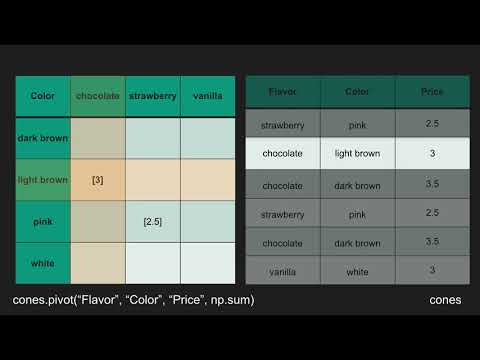

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [ ]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

We want to use this table to generate arrays with the names of each professor in each department.

**Question 1.** Set `prof_names` to a table with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `faculty` with each row in that second column containing an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

<!--
BEGIN QUESTION
name: q2_1
-->

In [27]:
# Pick one of the two functions defined below in your call to group.
def function1(array):
    '''Returns the first item'''
    return array.item(0)

def function2(array):
    '''Returns the array that is passed through'''
    return array 

# Make a call to group using one of the functions above when you define prof_names
prof_names = profs
prof_names

In [ ]:
ok.grade("q2_1");

#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step.

**Question 2.** At the moment, the ```name``` column of the `profs` table is sorted by last name. Would the arrays you generated in the `faculty` column of the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`. Explain your answer.  

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the position as the columns. The values in the rows should correspond to a salary range, where range is defined as the **difference between the highest salary and the lowest salary in the department for that position**. 

*Hint 1: First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the range of salaries in that array.*

*Hint 2: What table function allows you to specify the rows and columns of a new table? You probably watched a video on it earlier in the homework!*

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [34]:
# Define salary_range first
...
    ...

department_ranges = ...
department_ranges

In [ ]:
ok.grade("q2_3");

**Question 4.** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question.

<!--
BEGIN QUESTION
name: q2_4
manual: True
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 5.** Create a new table called `department_and_counts` with a column called `department` and a column called `count` for the number of positions within that department that have an average salary above $100,000. If the department doesn't have any positions with an average salary above 100k, then it should not have a row in the final table.

*Hint 1: Use pen and paper to draw out the intermediate tables to answer this question. This question is difficult! The variable names provided are meant to help guide the intermediate steps and general thought process.*

*Hint 2: Remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html).*

<!--
BEGIN QUESTION
name: q2_5
manual: False
-->

In [39]:
no_names = ...
salaries_by_department_position = ...
positions_above_100k = ...
department_and_counts = ...
department_and_counts

In [ ]:
ok.grade("q2_5");

## 3. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. **IMPORTANT: Make sure to check that your submission is not empty. We cannot guarantee that the submission will be valid, so please check it now.** If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

**NOTE:** The tests that are provided are not comprehensive and act as sanity checks (i.e. to make sure you answer is in the correct form, etc.). Passing the tests for a question does not mean that you answered the question correctly.

In [43]:
_ = ok.submit()

In [44]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")